## Random Forest - Regression

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df.shape

(301, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [24]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [26]:
numerics = df.select_dtypes(exclude='O')

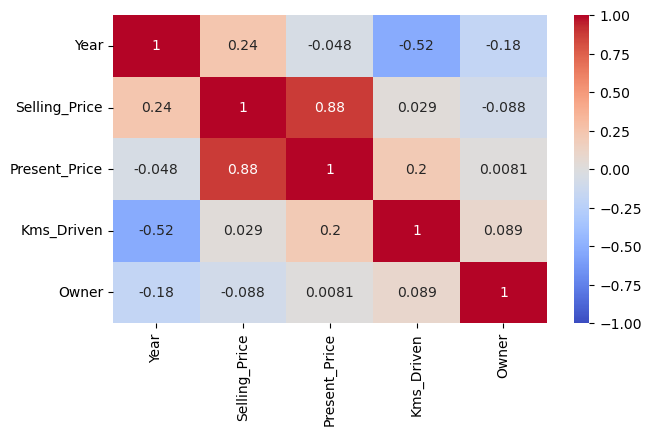

In [27]:
sns.heatmap(numerics.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

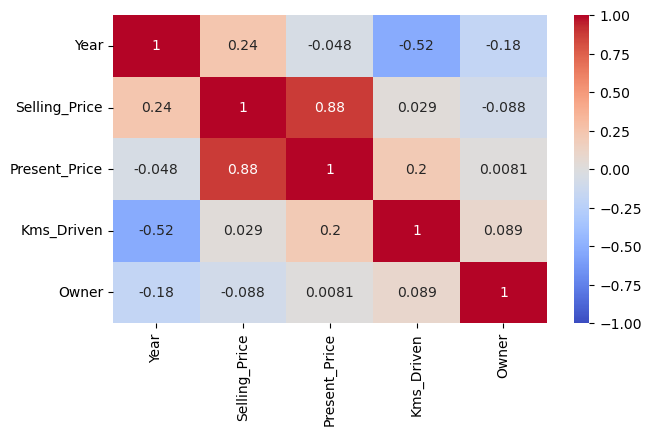

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
df["vehicle_age"]=2022-df.Year

# We transform the vehicle production year in our data into an age feat.

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [32]:
df.select_dtypes("object").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [33]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

# we see how many unique observations the categorical features consist of.
# The number of unique categorical observations of car_name is very high compared
# to the total number of observations in our data.

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [34]:
display(df.Car_Name.value_counts().head(10), df.Car_Name.value_counts().tail(10))

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

Car_Name
Hero Passion X pro          1
Yamaha Fazer                1
TVS Sport                   1
Honda Dream Yuga            1
etios gd                    1
Honda CB Trigger            1
Yamaha FZ S                 1
Bajaj Pulsar 135 LS         1
Activa 4g                   1
Bajaj Avenger Street 220    1
Name: count, dtype: int64

In [35]:
df.drop(columns=["Car_Name","Year"], inplace=True)

# Although we have 301 observations, there are 98 unique car/engine brands in car_name.
# Converting to numeric data by applying this feature ordinal encoder will not be a meaningful course of action.
# Because the DT model tends to place more emphasis on high cardinality categorical features
# (features that contain too many unique categorical observations).
# This causes these featurs to come to the fore in feature importance.

# There are also 1-2 of most brands and models. Naturally, we remove this feat as it will not contribute to education.

# Since we have converted the Year featur, which is the year of vehicle production, to the Age feat,
# we are removing the Year feature along with the car_name.

In [36]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


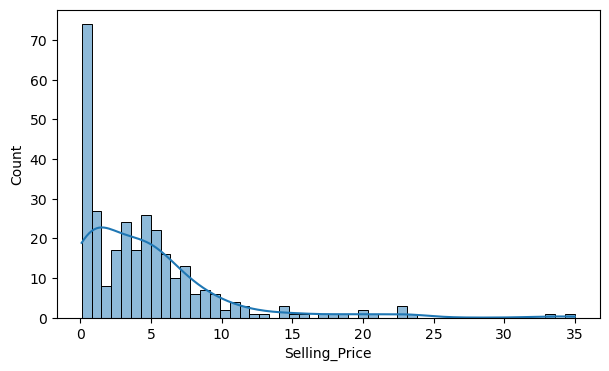

In [37]:
sns.histplot(df.Selling_Price, bins=50, kde=True);

# Tree based models are very robust against outliers. However, this is not the case for small regression data.
# Since outlier values in small regression data can seriously increase or decrease the average prices on fallen leaves,
# it is important to reduce these outlier observations, which are insufficient for training, in tree-based models.

# However, as always, we should compare the scores both with the outliers and by reducing the outliers and
# see the differences.

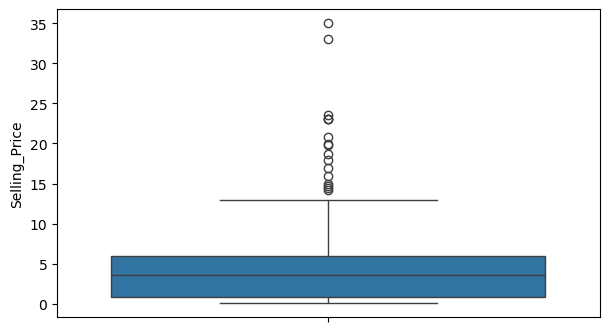

In [38]:
sns.boxplot(df.Selling_Price);

## Train test split

In [39]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling with Pipeline

In [41]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,root_mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [45]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.985457,0.964913
mae,0.243057,0.553467
mse,0.369900,0.941749
rmse,0.608194,0.970438
mape,0.060866,0.152692


In [46]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]


#It is slight overfitting.

test_r2                                     0.866428
train_r2                                    0.980836
test_neg_mean_absolute_error               -0.743481
train_neg_mean_absolute_error              -0.268321
test_neg_mean_squared_error                -3.238383
train_neg_mean_squared_error               -0.487155
test_neg_root_mean_squared_error           -1.546729
train_neg_root_mean_squared_error          -0.693965
test_neg_mean_absolute_percentage_error    -0.184825
train_neg_mean_absolute_percentage_error   -0.066062
dtype: float64

## Removing Outliers

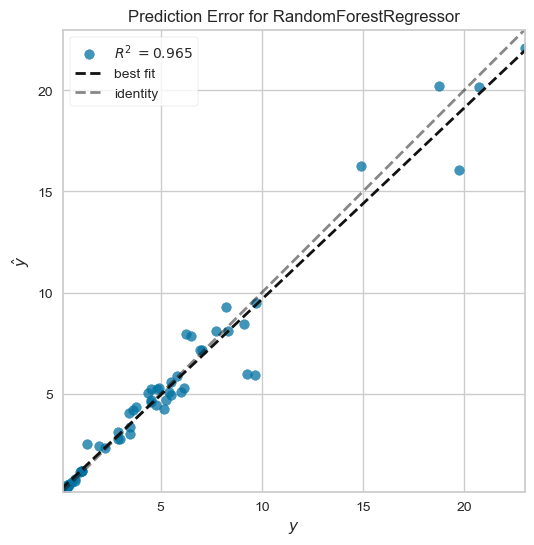

In [47]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Values bigger than 10 effect our predictions.

In [48]:
len(df[df.Selling_Price > 10])

28

In [49]:
28/301

0.09302325581395349

In [50]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [51]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [53]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [54]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# Overfitting has been reduced but there is still room for improvement.
# Let's do CV.

,train,test
R2,0.992679,0.954393
mae,0.151930,0.344911
mse,0.052827,0.311590
rmse,0.229842,0.558202
mape,0.057374,0.195318


In [55]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# overfiting confirmed.

test_r2                                     0.942104
train_r2                                    0.992245
test_neg_mean_absolute_error               -0.420496
train_neg_mean_absolute_error              -0.153659
test_neg_mean_squared_error                -0.394720
train_neg_mean_squared_error               -0.055889
test_neg_root_mean_squared_error           -0.617712
train_neg_root_mean_squared_error          -0.236255
test_neg_mean_absolute_percentage_error    -0.157115
train_neg_mean_absolute_percentage_error   -0.058803
dtype: float64

## Visualizing trees

In [56]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [57]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(15,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], filled=True, feature_names=features, fontsize=8);



         train      test
R2    0.928014  0.925533
mae   0.471504  0.499039
mse   0.519415  0.508759
rmse  0.720705  0.713274
mape  0.222501  0.412056




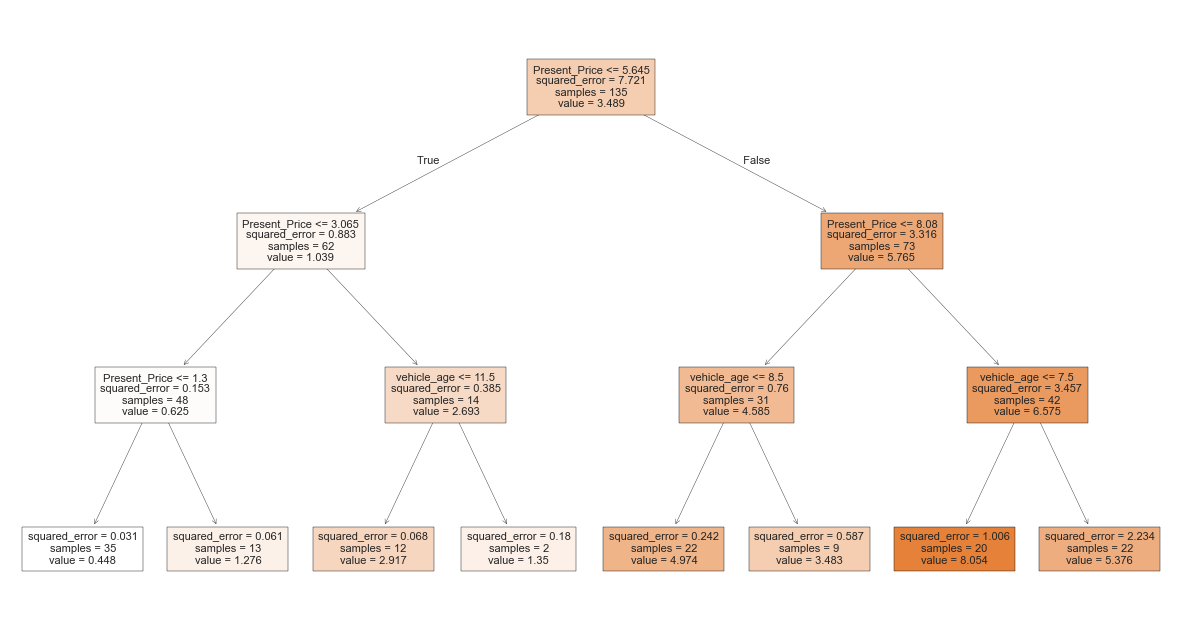

In [58]:
RF_model = RandomForestRegressor(n_estimators=250, max_depth=3, n_jobs=-1, random_state=101, )

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree, 10)

# The first difference from classification is criterion='squared_error'.
# If you remember, this hyper_parameter was gini, entropy or log_loss in clasification.
# In regression, criterion= "squared_error", "absolute_error", "poisson" can take one of the values.
# But usually this value is used by default because the model gets the best results in "squared_error".

# The second difference is sqrt by default in max_feature classification and 1.0 in regression.
# So it uses all the features.

# squared error represents mean squared error. A leaf's error of 0 indicates that all
# the cars falling on that leaf are of the same price, while a value close to 0 indicates
# that the prices are very close to each other. A high error value indicates that the prices of
# that leaf are very close to each other. indicates that irrelevant cars have crashed.

# samples shows the total number of observations in the corresponding leaf.
# (according to the boostrap method, it is about 2/3 of the observations in the train data)

# value shows the average price of the observations in the relevant sheet.

# The value of the leaf on whichever leaf we predict falls on, becomes the value predicted by the model of the car.

## GridSearch

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(n_jobs=-1, random_state=101))]

model = Pipeline(steps=operations)

In [61]:
param_grid = {"RF_model__criterion":["squared_error", "absolute_error"], # "poisson"
              "RF_model__n_estimators":[50, 100],
              "RF_model__max_depth": [2,3],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3, 5],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]} #None, auto, 1.0 all same

# Breman, who developed the random forest, recommended 64 as the number of trees,
# and 1/3 of the total number of features in max_features with grid search in his notes.

# GridsearchCV cannot prevent overfiting, so we need to limit the parameter space to need.

In [62]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [63]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['squared_error',
                                                 'absolute_error'],
                         'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', 2.3333333333333335,
                                                    6],
                         'RF_model__min_samples_leaf': [1, 2, 3],
                         'RF_model__min_samples_split': [2, 3, 5],
                         'RF_model__n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [64]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       min_samples_leaf=3, n_jobs=-1,
                                       random_state=101))])

In [65]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]
# no overfiting

mean_test_score    -0.830975
mean_train_score   -0.726713
Name: 103, dtype: object

In [66]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.925974,0.931086
mae,0.478240,0.494936
mse,0.534135,0.470824
rmse,0.730845,0.686166
mape,0.223976,0.412106


In [67]:
params = {i.split("__")[1]:j for i,j in grid_model.best_params_.items()}
params

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [68]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(**params, random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_r2                                     0.895847
train_r2                                    0.926768
test_neg_mean_absolute_error               -0.564698
train_neg_mean_absolute_error              -0.473873
test_neg_mean_squared_error                -0.741292
train_neg_mean_squared_error               -0.528369
test_neg_root_mean_squared_error           -0.830975
train_neg_root_mean_squared_error          -0.726713
test_neg_mean_absolute_percentage_error    -0.252948
train_neg_mean_absolute_percentage_error   -0.221771
dtype: float64

## Feature Importance

In [69]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(**params, random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# for feature importance, not forget that we should use the best hyper parameters we found.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       min_samples_leaf=3, random_state=101))])

In [70]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [71]:
pipe_model["RF_model"].feature_importances_

array([2.18221538e-04, 9.72380309e-02, 0.00000000e+00, 7.97146561e-01,
       2.08234707e-02, 0.00000000e+00, 8.45737157e-02])

In [72]:
df_f_i = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_,
                      index=features,
                      columns=["Feature Importance"])
df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.797147
Seller_Type,0.097238
vehicle_age,0.084574
Kms_Driven,0.020823
Fuel_Type,0.000218
Transmission,0.000000
Owner,0.000000


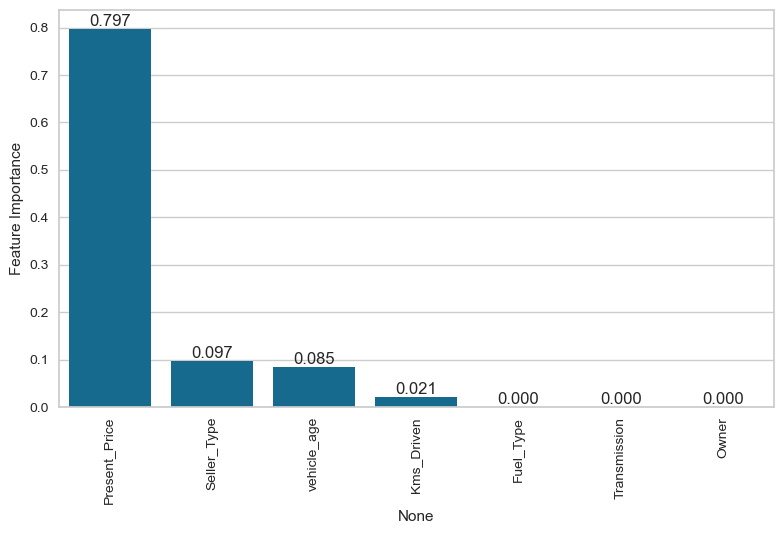

In [73]:
ax = sns.barplot(x = df_f_i.index,
                y = 'Feature Importance',
                data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

# If a feature value is 0 after RF, that feature really has no effect on estimation.
# Because RF gets insight from all featurlare.

## Feature Selection

In [74]:
X2 = X[["Present_Price", "Seller_Type", "vehicle_age"]]
X2.head()

# Selecting first 3 features.

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,8
1,9.54,Dealer,9
2,9.85,Dealer,5
3,4.15,Dealer,11
4,6.87,Dealer,8


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X2, y, test_size=0.2, random_state=5)

In [76]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(**params, random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

# Close scores with 3 features

,train,test
R2,0.923617,0.928675
mae,0.485871,0.496918
mse,0.551147,0.487294
rmse,0.742393,0.698064
mape,0.226100,0.412015


In [77]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(**params, random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

# no overfitting

test_r2                                     0.893227
train_r2                                    0.925246
test_neg_mean_absolute_error               -0.574523
train_neg_mean_absolute_error              -0.478476
test_neg_mean_squared_error                -0.761837
train_neg_mean_squared_error               -0.539576
test_neg_root_mean_squared_error           -0.840487
train_neg_root_mean_squared_error          -0.734171
test_neg_mean_absolute_percentage_error    -0.254670
train_neg_mean_absolute_percentage_error   -0.224044
dtype: float64

## Final Model

In [78]:
X2.head()

# we deciden to build our final model with 3 features.

,Present_Price,Seller_Type,vehicle_age
0,5.59,Dealer,8
1,9.54,Dealer,9
2,9.85,Dealer,5
3,4.15,Dealer,11
4,6.87,Dealer,8


In [79]:
pipe_model["OrdinalEncoder"].fit_transform(X2).head()

# Let's not forget that the make_column_transform function changes our feature order.

,Seller_Type,Present_Price,vehicle_age
0,0.0,5.59,8
1,0.0,9.54,9
2,0.0,9.85,5
3,0.0,4.15,11
4,0.0,6.87,8


In [80]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(**params, random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Seller_Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       min_samples_leaf=3, random_state=101))])

## Prediction

In [81]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [82]:
df_samples = pd.DataFrame(samples)
df_samples

# Although my model was trained with 3 features, it was still able to return prediction even if I gave all the features.

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [83]:
pipe_model.predict(df_samples)

array([4.98076349, 5.76412586])